In [785]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [786]:
df = pd.read_csv('./data/Social_Network_Ads.csv')

In [787]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [788]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [789]:
print('Data nan')
for label in df.columns[0:]:
    print(f'{label} : {df[label].isnull().sum()}')

Data nan
User ID : 0
Gender : 0
Age : 0
EstimatedSalary : 0
Purchased : 0


In [790]:
df['Gender'] = (df['Gender'] == 'Male').astype('int')

In [791]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0


In [792]:
df = df.drop(columns = 'User ID',axis = 1)

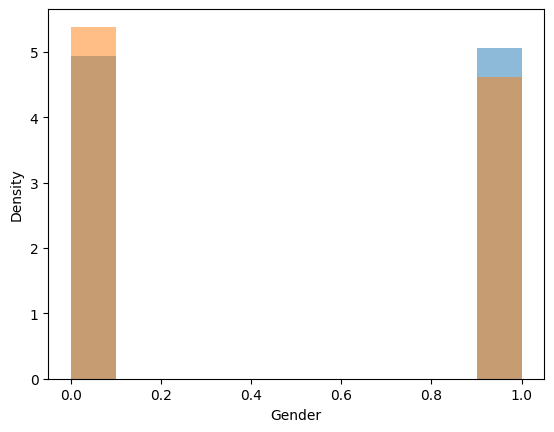

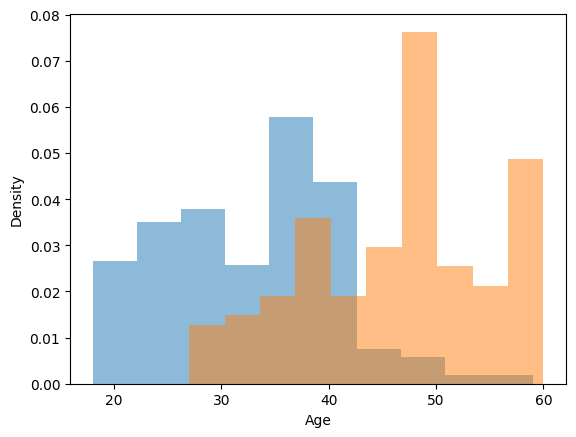

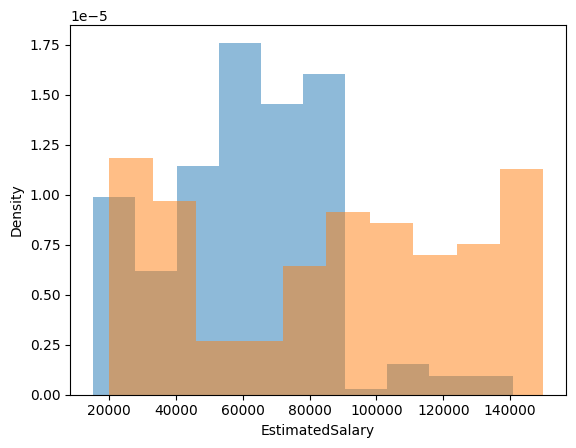

In [793]:
for label in df.columns[:-1]:
    plt.hist(df[df['Purchased'] == 0][label],alpha = 0.5, label = 'Chua mua sam',density = True)
    plt.hist(df[df['Purchased'] == 1][label],alpha = 0.5, label = 'Da mua sam',density = True)
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.show()

## Dữ liệu khá tuyến tính ở hai đặc trưng tuổi và mức lương 

In [794]:
from sklearn.model_selection import train_test_split
# Tach data set thanh ba phan tap dung de huan luyen và đánh giá mô hình tỷ lệ lấy 6/2/2
# Train huan luyen mo hinh
# Valid de chon ra mo hinh tot nhat L(train) and L(valid) deu o mot muc hop ly nao day \
# Test đánh giá chất lượng mô hình
train, test = train_test_split(df,train_size = .8,random_state = 50)
train, valid = train_test_split(train,train_size = .75, random_state = 30)

### Scaler Data
#### Why you need scale data
Given the use of small weights in the model and the use of error between predictions and expected values, the scale of inputs and outputs used to train the model are an important factor. Unscaled input variables can result in a slow or unstable learning process, whereas unscaled target variables on regression problems can result in exploding gradients causing the learning process to fail. 

#### Solution
<ol>
    <li>
        Scaler: X_scaler = $\frac{X}{Xmax}$<br>
    </li><br>
    <li>
        Mean normalization: X_scaler = $\frac{X - \bar{X}}{Xmax - Xmin}$<br>
    </li><br>
    <li>
        Z-score: X_scaler = $\frac{X - \bar{X}}{\sigma}$<br>
        <br>
        $\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{m}\sum\limits_{i=1}^m(X - \bar{X})^2}$
    </li>
</ol>

In [795]:
def scale_data(x,scale_mode=None):
    n = x.shape[1]
    list_scaler = []
    match scale_mode:
        case 'maxScaler':
            for j in range(n):
                max_scaler = np.max(x[:,j])
                x[:,j] = x[:,j]/max_scaler
                list_scaler.append({'max':max_scaler})
        case 'minMaxScaler':
            for j in range(n):
                mean_x = x[:,j].mean()
                max_x = np.max(x[:,j])
                min_x = np.min(x[:,j])
                x[:,j] = (x[:,j] - mean_x)/(max_x - min_x)
                list_scaler.append({'max':max_x,'min':min_x,'mean':mean_x})
        case _:
            '''z-score: ScalerStanderd'''
            for j in range(n):
                mean_x = x[:,j].mean()
                std_x = x[:,j].std()
                x[:,j] = (x[:,j] - mean_x)/std_x
                list_scaler.append({'mean':mean_x,'std':std_x})
    return x,list_scaler

### Xét đặc trưng mức lương và việc mua sắm

In [796]:
x_train = np.array(train['EstimatedSalary']).reshape(-1,1).astype('float')
y_train = np.array(train['Purchased']).reshape(-1,1)
x_valid = np.array(valid['EstimatedSalary']).reshape(-1,1).astype('float')
y_valid = np.array(valid['Purchased']).reshape(-1,1)
x_test = np.array(test['EstimatedSalary']).reshape(-1,1).astype('float')
y_test = np.array(test['Purchased']).reshape(-1,1)

In [797]:
x_train,mode_scaler = scale_data(x_train)

In [798]:
x_test[:,0] = (x_test[:,0] - mode_scaler[0]['mean'])/mode_scaler[0]['std']
x_valid[:,0] = (x_valid[:,0] - mode_scaler[0]['mean'])/mode_scaler[0]['std']

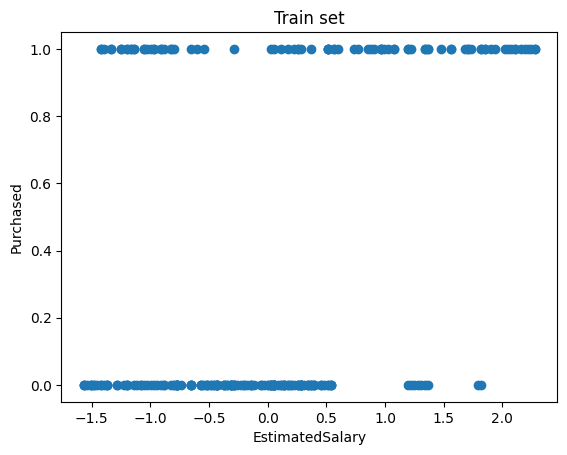

In [799]:
plt.scatter(x_train,y_train)
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.title('Train set')
plt.show()



### What is Logistic Regression?
Hồi quy logistic là một phương pháp phân tích thống kê để dự đoán kết quả nhị phân dựa trên các ví dụ huấn luyện trước đấy
### Terminology
x: input or feature<br>
$\hat{y}$: output or target<br>
m: number of training samples<br>
n: characteristic number<br>
$(x^i,y^i)$: training example<br>
### Funtion Logistic Regression (Sigmoid Funtion)
$\hat{y}$ = $g(x)$ = $\frac{1}{1+e^{-z}}$
with : z = $\vec{w}\vec{x} + b$

##### ? Tại sao không nên dùng linear regression cho bài toán phân loại này
Hồi quy tuyến tính là cơ sở ban đầu để phân loại và được sử dụng rộng rãi để phân tích phân biệt trước khi các phương pháp khác trở nên khả thi.
Lý do khiến nó được cho là không phù hợp là vì mọi người muốn có xác suất và nó không giỏi trong việc đưa ra những xác suất hợp lý.
Hồi quy logistic phù hợp hơn nhưng đòi hỏi tính toán nhiều hơn.


In [800]:
def linear(w,b,x):
    return np.dot(w,x) + b

In [801]:
def sigmoid (w,b,x):
    return 1/(1 + np.exp(-(linear(w,b,x))))

## Loss Funtion
J(x) = $\frac{-1}{m}\sum\limits_{i=1}^m(y^ilog(f(x^i))+(1-y^i)(log(1-f(x^i)))$<br>
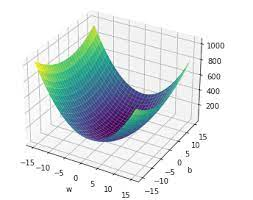
### Want
J(x) $\approx 0$

##### ? Tại sao phải dùng hàm log để tính cho hàm loss funtion mà không phải hàm khác hay cách tính như hôi quy tuyến tính
Việc lấy log cho hàm loss funtion để thuận tiện và dễ tính toán tìm được điểm tối ưu cục bộ, nếu sử dụng cách tính như hồi quy tuyến tính thì loss funtion lúc này sẽ bị phân kì 
### Problem abou overfit
Overfitting occurs when the model is too complex to simulate the training data. This particular thing happens when the amount of training data is too small while the model complexity is too high.<br>
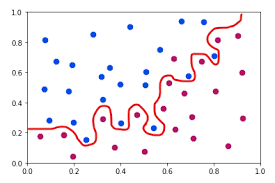
## Solution
<ol>
    <li>Validation</li>
    <li>Cross-validation</li>
    <li>
        Regularization<br>
        <p>We add to the loss function a lambda symbol with parameters to reduce the influence of less important parameters on the model output</p>
        => J(x) = $\frac{-1}{m}\sum\limits_{i=1}^m(y^ilog(f(x^i))+(1-y^i)(log(1-f(x^i))+\lambda\sum\limits_{i=1}^n (w_j^2)$)<br>
        <p>I omitted the regularization of parameter b because it is a free parameter</p>
        <p></p>
    </li>
</ol>

## About underfiting and overfiting

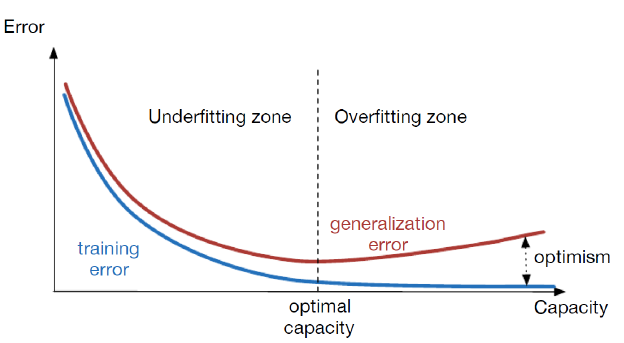


Underfiting (high bais) là khi J(train) and J(valid) đều giảm và ở một cái mức nào đấy mà loss funtion vẫn còn quá lớn<br>
Overfiting (high variance)là khi J(train) giảm còn J(valid) tăng khi này mô hình bị quá khớp với tập huấn luyện training

### với bậc của đa thức
với bậc của đa thức thấp chúng ta dễ gặp vấn đề về underfiting (high bias)<br>
với bậc của đa thức cao chúng ta dễ gặp vấn đề về overfiting (high variance)

### với lambda
với $\lambda$ lớn làm giảm ảnh hưởng của các tham số  thấp gây ra hiện tượng underfiting <br>
với $\lambda$ nhỏ chấp nhận ảnh hưởng chung của các tham số dễ gây ra vấn đề về overfiting <br>

In [802]:
def loss_funtion(w,b,x,y):
    loss = 0
    m, n = x.shape
    for i in range(m):
        loss += (y[i]*np.log(sigmoid(w,b,x[i])) + (1 - y[i])*(np.log(1-sigmoid(w,b,x[i]))))
    return (-1/m)*loss

In [803]:
def regularsization_loss(w,b,x,y,lambda_):
    loss = loss_funtion(w,b,x,y)
    m,n = x.shape
    for j in range(n):
        loss += w[j]**2
    loss += (lambda_/(2*m))*loss
    return loss

In [804]:
w = np.linspace(-10, 10, 30)
b = np.linspace(-10, 10, 30)
loss = []
for i in range(w.size):
    loss.append(loss_funtion(np.array(w[i]).reshape(-1,1),b[i],x_train,y_train))

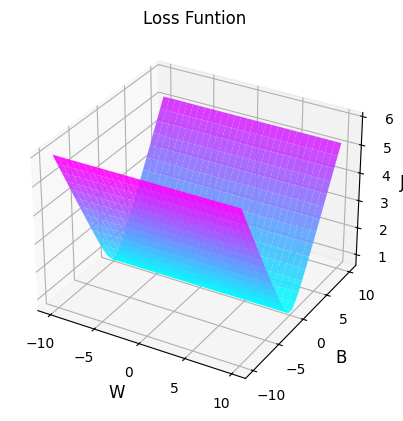

In [805]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(np.meshgrid(w,b)[0],np.meshgrid(w,b)[1], np.array(loss).reshape(-1,1), cmap='cool', alpha=0.9)
ax.set_title('Loss Funtion')
ax.set_xlabel('W', fontsize=12)
ax.set_ylabel('B', fontsize=12)
ax.set_zlabel('J(w)', fontsize=12)
plt.show()

### Gradient
Derivative of a function is the tangent on the graph at some point. Gradient is just the partial derivative<br>

$\Delta{J(x)} = \begin{cases} \Delta{w_j} = \frac{1}{m}\sum\limits_{i=1}^m(\hat{y^i} - y^i)x^i_j\\ \Delta{b} = \frac{1}{m}\sum\limits_{i=1}^m(\hat{y^i} - y^i)\end{cases}$<br>
### Gradien with overfit
$\Delta{J(x)} = \begin{cases} \Delta{w_j} = \frac{1}{m}(\sum\limits_{i=1}^m(\hat{y^i} - y^i)x^i_j + \lambda w_j)\\ \Delta{b} = \frac{1}{m}\sum\limits_{i=1}^m(\hat{y^i} - y^i)\end{cases}$

$\hat{y^i} = sigmoid funtion (g(z))$

In [806]:
def gradient(w,b,x,y,lambda_ = 0):
    m, n = x.shape
    grd_w = np.zeros(n)
    grd_b = 0
    for i in range(m):
        e = (sigmoid(w,b,x[i]) - y[i])
        for j in range(n):
            grd_w[j] += e*x[i,j]
            grd_b += e
    for j in range(n):
        grd_w[j] += lambda_*w[j]
    return [grd_w/m,grd_b/m]

### Gradient Descent
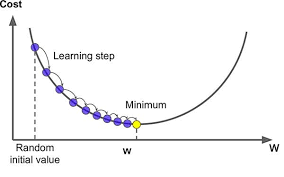<br>
Gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent.
### Update Paramenter
$w_j = w_j - \alpha*\Delta{w_j}$<br>
$b = b - \alpha*\Delta{b}$

$\alpha: learning rate$<br>
We are moving step by step towards the  global minimum

In [807]:
def update_pramenter(w,b,x,y,lr,lambda_):
    n = x.shape[1]
    grd_w, grd_b = gradient(w,b,x,y,lambda_)
    for j in range(n):
        w[j] = w[j] - lr*grd_w[j]
    b = b - lr*grd_b
    return [w,b]

### Problem with learning rate
If big learning rate means that you roughly search for the best area in the space. Then, with a small learning you tune the weights to find the best value and you would use constant big learning rate you would "jump" around the minimum point. If you would use constant small learning rate it would take a lot of time to converge.<br><br><br> 
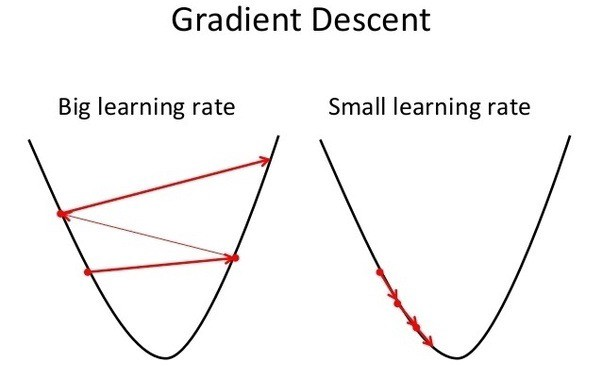<br><br>
So we tried to find the best learning rate in the first step by calculating on base 10

In [808]:
def _learning_rate(w,b,x,y,lr,lambda_):
    n = x.shape[1]
    grd_w, grd_b = gradient(w,b,x,y,lambda_)
    flag = True
    loss_0 = regularsization_loss(w,b,x,y,lambda_)
    while(True):
        w1 = w.copy()
        b1 = 0
        w1, b1 = update_pramenter(w1,b1,x,y,lr,lambda_)
        loss_1 = regularsization_loss(w1,b1,x,y,lambda_)
        if(loss_0 < loss_1):
            lr = lr /10
        else:
            return lr

In [809]:
def logistic_regression(x,y,x_cv=None,y_cv=None,learning_rate = 0.01,lambda_=0,loop_size = 1000,flag = 0.00001):

    '''
    loop_size số bước lặp mong muốn default = 1000
    
    flag cờ khi gía trị giảm đến giá trị mong muốn default = 0.000001
    
    '''
    
    m, n = x.shape
    w = np.zeros(n)
    b = 0
    learning_rate = _learning_rate(w,b,x,y,learning_rate,lambda_)
    loss_train = [loss_funtion(w,b,x,y)]
    if(x_cv is not None and y_cv is not None):
        loss_valid = [loss_funtion(w,b,x_cv,y_cv)]
        for _ in range(loop_size):
            w, b = update_pramenter(w,b,x,y,learning_rate,lambda_)
            loss_ = loss_funtion(w,b,x,y)
            if(loss_train[_] - loss_ <= flag):
                break
            loss_train.append(loss_)
            loss_valid.append(loss_funtion(w,b,x_cv,y_cv))
        return (w,b,loss_train,loss_valid)
    elif((x_cv is None and y_cv is not None) or (x_cv is not None and y_cv is None)):
        raise ValueError(f'not defined valid set')
    else:
        for _ in range(loop_size):
            w, b = update_pramenter(w,b,x,y,learning_rate,lambda_)
            loss_ = loss_funtion(w,b,x,y)
            if(loss_train[_] - loss_ <= flag):
                break
            loss_train.append(loss_)
        return (w,b,loss_train)

In [810]:
w,b,loss_train,loss_valid = logistic_regression(x_train,y_train,x_cv = x_valid, y_cv = y_valid)

/tmp/ipykernel_4477/761746608.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grd_w[j] += e*x[i,j]


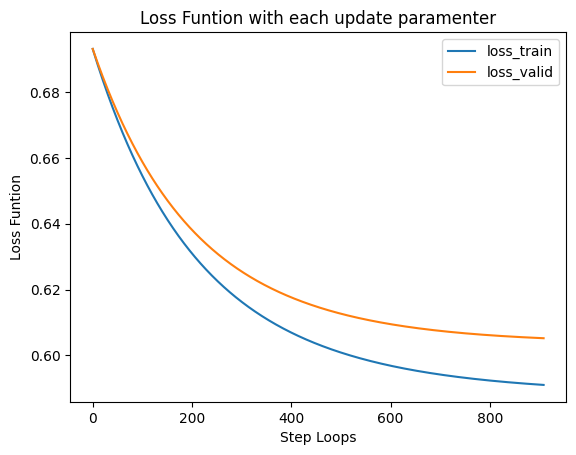

In [811]:
plt.plot(np.arange(len(loss_train)),loss_train,label = 'loss_train')
plt.plot(np.arange(len(loss_train)), loss_valid,label ='loss_valid')
plt.title('Loss Funtion with each update paramenter')
plt.xlabel('Step Loops')
plt.ylabel('Loss Funtion')
plt.legend()
plt.show()

In [812]:
loss[len(loss)-1]

array([5.16161933])

In [813]:
x_ = np.linspace(np.min(x_train),np.max(x_train),50)
y_ = np.array([sigmoid(w,b,x) for x in x_])
y__ = np.array([linear(w,b,x) for x in x_])

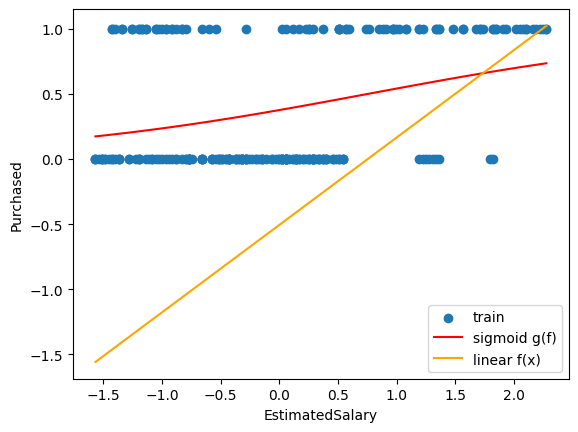

In [814]:
plt.scatter(x_train,y_train,label = 'train')
plt.plot(x_,y_,color ='r',label='sigmoid g(f)')
plt.plot(x_,y__,color = 'orange',label='linear f(x)')
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.legend()
plt.show()

In [815]:
### Danh gia train
y_pred = np.array([sigmoid(w,b,x_) for x_ in x_train])

In [816]:
y_pred = (y_pred >= 0.5).astype(int)

### Các tiêu chí đánh giá chất lượng mô hình

In [817]:
from sklearn.metrics import ConfusionMatrixDisplay

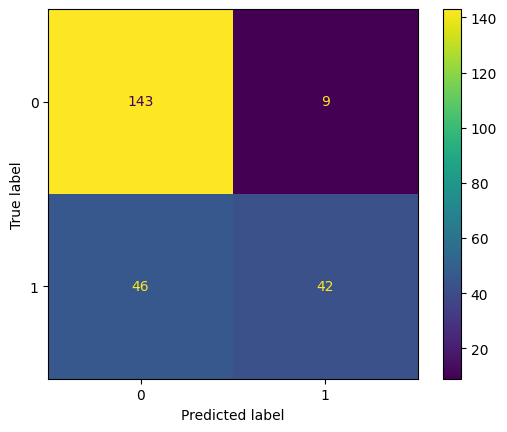

In [818]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred)

#### Mât cần bằng hai lớp khi lớp 0 có 189 train còn lớp 0 có 51 train

#### Đây đường chéo chính là những dự đoán đúng cho lớp của nó 
Lớp 0 có 143 dự đoán đúng và lớp 1 có 42 dư đoán đúng 

### Đánh giá chất lượng mô hình

<table>
    <tr>
        <td>
            .
        </td>
        <td>
            Actual
        </td>
        <td>
            Class
        </td>
    </tr>
    <tr>
        <td>
            Perdict
        </td>
        <td>
            True Positive
        </td>
        <td>
            False Positive
        </td>
    </tr>
    <tr>
        <td>
            Class
        </td>
        <td>
            False Negative
        </td>
        <td>
            True Negative
        </td>
    </tr>
</table>


Position: tỉ lệ đưa ra dự đoán đúng trong lớp đự đoán<br>
position = $\frac{True Positive}{Perdict} = \frac{True Positive}{True Pos + False Pos}$<br>

Recall tỉ lệ đưa ra dự đoán đúng ở lớp thật sự<br>
recall = $\frac{True Positive}{Actual} = \frac{True Positive}{True Pos + False Neg}$

#### Want Position and Recall cao
Cách tăng Position đó là tăng ngưỡng dự đoán chắc chắn hơn<br>
h(x) = 1    if   g(z) >= 0.9<br>
h(x) = 0    if   g(z) < = 0.1<br>

Cách tăng Recall đó là giảm ngương dự đoán <br>
h(x) = 1    if   g(z) < 0.3<br>
h(x) = 0    if   g(z) >= 0.7<br>


#### Đánh đổi giữa Position và Recall


FScore đánh giá độ thu hồi của recall và position tránh cho trường hợp quá lệch giữa position và recall<br>
Fscore = $2*\frac{position*recall}{position + recall}$


In [819]:
from sklearn.metrics import classification_report

In [820]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       152
           1       0.82      0.48      0.60        88

    accuracy                           0.77       240
   macro avg       0.79      0.71      0.72       240
weighted avg       0.78      0.77      0.75       240



### ROC and AUC
ROC:Là biểu đồ hiển thị hiệu suất của mô hình phân loại ở tất cả các ngưỡng phân loại. Đường cong này vẽ hai tham số:<br>
Tỷ lệ tích cực thực sự(TPR)<br>
Tỷ lệ dương tính giả(FPR)<br>

TPR = $\frac{TP}{TP + FN}$<br>

FDR = $\frac{FP}{FP + TN}$<br>

Đường cong ROC vẽ đồ thị TPR so với FPR ở các ngưỡng phân loại khác nhau. Việc giảm ngưỡng phân loại sẽ phân loại nhiều mục hơn thành tích cực, do đó làm tăng cả Kết quả dương tính giả và Kết quả tích cực thực sự.<br>

AUC: Diện tích dưới đường cong ROC<br>
AUC đo toàn bộ diện tích hai chiều bên dưới toàn bộ đường cong ROC

In [821]:
def point_roc_(x_,y_,alm):
    y_pred = np.array([sigmoid(w,b,x_) for x_ in x_])
    y_pred = (y_pred >= alm).astype(int)
    tp = np.count_nonzero((y_pred == y_) & (y_ == 1))
    fn = np.count_nonzero(y_ == 1) - tp        
    fp = np.count_nonzero(y_pred == 1) - tp
    tn = np.count_nonzero(y_pred == y_) - tp
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    return [fpr,tpr]

In [822]:
alm =  np.linspace(0,1,50)

In [823]:
poit_z = [point_roc_(x_train,y_train,alm) for alm in alm]

In [824]:
x,y = list(zip(*poit_z))

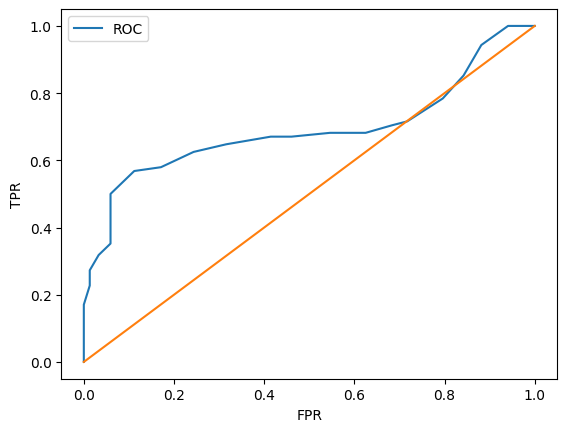

In [825]:
plt.plot(x,y,label = 'ROC')
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### Đánh giá mô hình trên tập test

In [826]:
y_pred = np.array([sigmoid(w,b,x_) for x_ in x_test])

In [827]:
y_pred = (y_pred >= 0.5).astype(int)

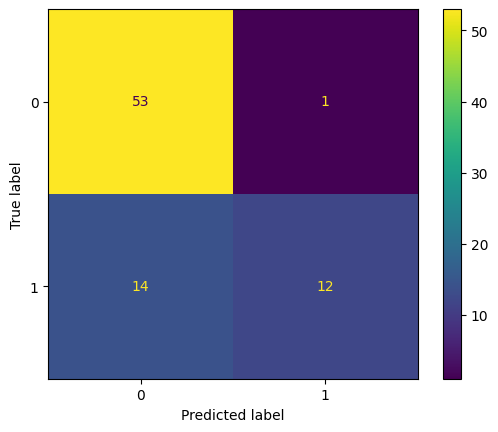

In [828]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [829]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        54
           1       0.92      0.46      0.62        26

    accuracy                           0.81        80
   macro avg       0.86      0.72      0.75        80
weighted avg       0.83      0.81      0.79        80



### 2 Paramenter

In [830]:
x_train = np.array(train[train.columns[1:3]])
y_train = np.array(train['Purchased']).reshape(-1,1)
x_valid = np.array(valid[valid.columns[1:3]])
y_valid = np.array(valid['Purchased']).reshape(-1,1)
x_test = np.array(test[valid.columns[1:3]])
y_test = np.array(test['Purchased']).reshape(-1,1)

In [831]:
x_train,mode_scaler = scale_data(x_train)

In [832]:
x_test[:,0] = (x_test[:,0] - mode_scaler[0]['mean'])/mode_scaler[0]['std']
x_valid[:,0] = (x_valid[:,0] - mode_scaler[0]['mean'])/mode_scaler[0]['std']
x_test[:,1] = (x_test[:,1] - mode_scaler[1]['mean'])/mode_scaler[1]['std']
x_valid[:,1] = (x_valid[:,1] - mode_scaler[1]['mean'])/mode_scaler[1]['std']

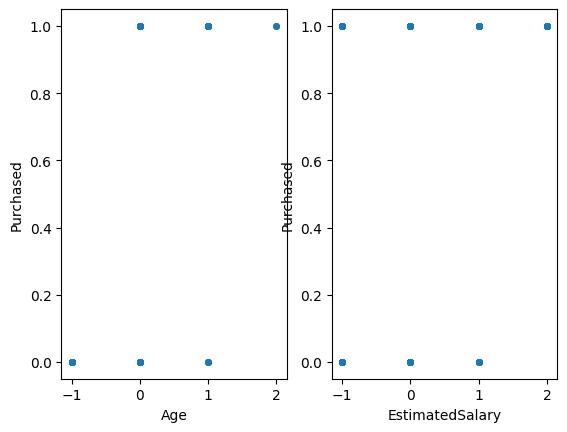

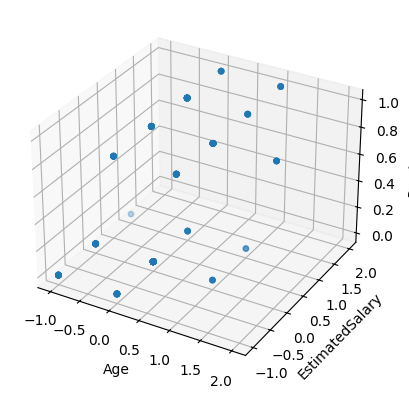

In [833]:
plt.subplot(1,2,1)
plt.scatter(x_train[:,0],y_train,s=15)
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.subplot(1,2,2)
plt.scatter(x_train[:,1],y_train,s=15)
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_train[:,0],x_train[:,1],y_train,s=15)
ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')
plt.show()

In [834]:
w,b,loss_train,loss_valid = logistic_regression(x_train,y_train,x_cv = x_valid, y_cv = y_valid)

/tmp/ipykernel_4477/761746608.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grd_w[j] += e*x[i,j]


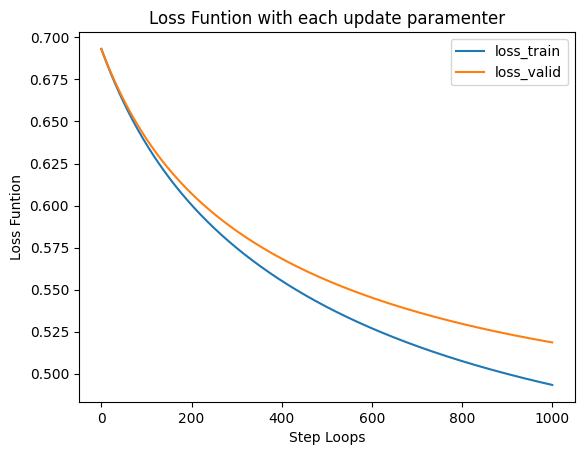

In [835]:
plt.plot(np.arange(len(loss_train)),loss_train,label = 'loss_train')
plt.plot(np.arange(len(loss_train)), loss_valid,label ='loss_valid')
plt.title('Loss Funtion with each update paramenter')
plt.xlabel('Step Loops')
plt.ylabel('Loss Funtion')
plt.legend()
plt.show()

In [836]:
x_age = np.linspace(-1,2,1000).reshape(-1,1)
x_salary = np.linspace(-1,2,1000).reshape(-1,1)
x_ = np.hstack([x_age,x_salary])
x_age, x_salary = np.meshgrid(x_age,x_salary)
y_sig = np.array([sigmoid(w,b,x_[i]) for i in range(1000)]).reshape(-1,1)
y_lir = np.array([linear(w,b,x_[i]) for i in range(1000)]).reshape(-1,1)
y_pred = np.array([sigmoid(w,b,x_train[i]) for i in range(y_train.size)]).reshape(-1,1)
y_0 = np.array([linear(w[0],b,x_train[:,0])]).reshape(-1,1)
y_1 = np.array([linear(w[1],b,x_train[:,1])]).reshape(-1,1)
x__ = np.linspace(-1,2,50)

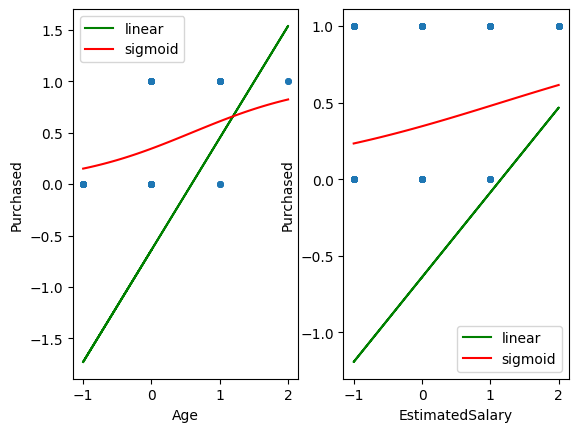

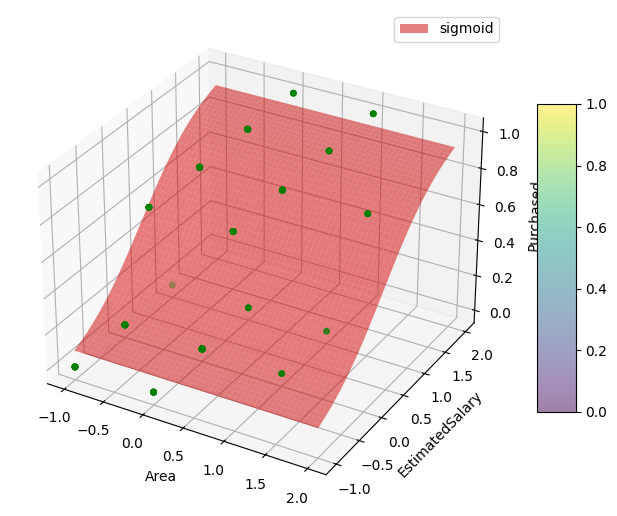

In [837]:
plt.subplot(1,2,1)
plt.scatter(x_train[:,-0],y_train,s=15)
plt.plot(x_train[:,0],y_0,color ='green',label = 'linear')
plt.plot(x__,np.array([sigmoid(w[0],b,x_) for x_ in x__]),color ='red',label = 'sigmoid')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(x_train[:,-1],y_train,s=15)
plt.plot(x_train[:,1],y_1,color ='green',label = 'linear')
plt.plot(x__,np.array([sigmoid(w[1],b,x_) for x_ in x__]),color ='red',label = 'sigmoid')
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.legend()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0],x_train[:,1],y_train,s=15,color ='green')
surf  = ax.plot_surface(x_age,x_salary, y_sig, color = 'red', alpha=0.5,label = 'sigmoid')
fig.colorbar(surf, shrink=0.5, aspect=8)
plt.legend()
ax.set_xlabel('Area')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')
plt.show()

In [838]:
y_pred = np.array([sigmoid(w,b,x_) for x_ in x_train])

In [839]:
y_pred = (y_pred >= 0.5).astype(int)

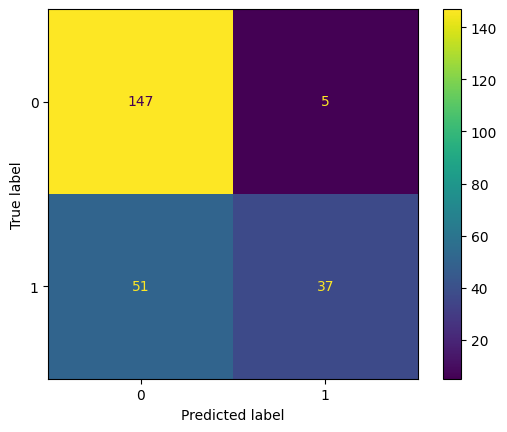

In [840]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred)

In [841]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       152
           1       0.88      0.42      0.57        88

    accuracy                           0.77       240
   macro avg       0.81      0.69      0.70       240
weighted avg       0.79      0.77      0.74       240



In [842]:
poit_z = [point_roc_(x_train,y_train,alm) for alm in alm]

In [843]:
x,y = list(zip(*poit_z))

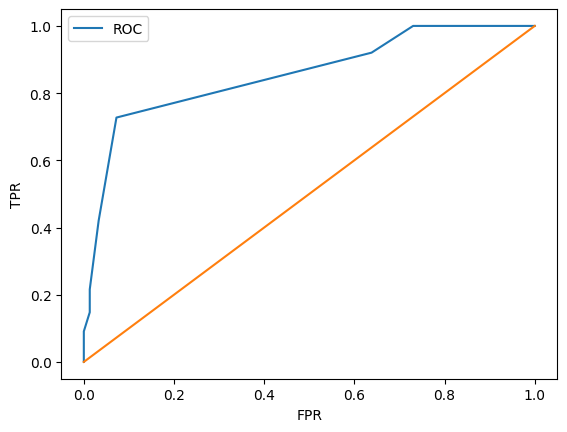

In [844]:
plt.plot(x,y,label = 'ROC')
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### Đánh gía mô hình trên tập test

In [845]:
y_pred = np.array([sigmoid(w,b,x_) for x_ in x_test])

In [846]:
y_pred = (y_pred >= 0.5).astype(int)

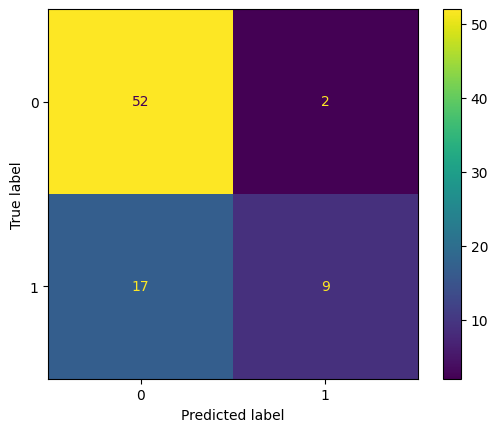

In [847]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [848]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.85        54
           1       0.82      0.35      0.49        26

    accuracy                           0.76        80
   macro avg       0.79      0.65      0.67        80
weighted avg       0.77      0.76      0.73        80



## Multi Classification

### Logistic Regression with skitlearn

In [849]:
from sklearn.linear_model import LinearRegression